<a href="https://colab.research.google.com/github/HareeshwarKarthikeyan/Strong-Language-Hate-Speech-Filter/blob/Nirav-Agarwal/model_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!pip install nltk
import nltk
from nltk.corpus import stopwords

In [4]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('finalcleandata.csv')
df.head()

,message,toxic,obscene,insult,racism,sexism
0,b'fuck you you red scumbag fuck you you red sc...,1,1,1,0,0
1,odeh is actions in the us proves that she is a...,0,0,0,1,0
2,b'clifton bristol the clifton ward also includ...,0,0,0,0,0
3,b' im not sexist but this is one seriously stu...,0,0,0,0,1
4,b'love a subtle menu sausage spatchcock tart p...,0,0,0,0,1


In [0]:
# Hyper-Parameters

MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 200 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)



In [0]:
label = ['toxic','obscene','insult','racism','sexism']

In [0]:
message = 'message'

In [0]:
def get_list(data):
    data = data.fillna("unknown")
    return data.tolist()

In [0]:
def tokenize_reshape(data):
    data = tok.texts_to_matrix(data)
    return np.reshape(data, (data.shape[0], 1, data.shape[1]))

In [0]:
x_train = get_list(df[message])


In [0]:
tok = Tokenizer(num_words=1000)
tok.fit_on_texts(x_train)

In [0]:
x_train = tokenize_reshape(x_train)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten

Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
model.add(LSTM(200, return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            960800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,281,801
Trainable params: 1,281,801
Non-trainable params: 0
_________________________________________________________________


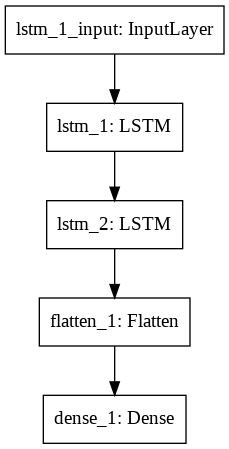

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [40]:
for i, j in enumerate(label):
    print("Train ",j)
    y_train = df[j].values
    model.fit(x_train, y_train, epochs=10)

Train  toxic
Epoch 1/10
14046/14046 [==============================] - 21s 2ms/step - loss: 0.0500 - acc: 0.9779
Epoch 2/10
14046/14046 [==============================] - 21s 1ms/step - loss: 0.0448 - acc: 0.9803
Epoch 3/10
14046/14046 [==============================] - 21s 2ms/step - loss: 0.0413 - acc: 0.9826
Epoch 4/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0337 - acc: 0.9843
Epoch 5/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0272 - acc: 0.9888
Epoch 6/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0270 - acc: 0.9882
Epoch 7/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0284 - acc: 0.9900
Epoch 8/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0235 - acc: 0.9907
Epoch 9/10
14046/14046 [==============================] - 21s 1ms/step - loss: 0.0203 - acc: 0.9917
Epoch 10/10
14046/14046 [==============================] - 20s 1ms/step - loss: 0.0179 

In [0]:
model1 = Sequential()
model1.add(LSTM(200, input_shape=(1, x_train.shape[2]), return_sequences=True))
model1.add(LSTM(200, return_sequences=True))
model1.add(Flatten())
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# for i, j in enumerate(label):
#     print("Train ",j)
#     y_train = df[j].values
#     model1.fit(x_train, y_train, epochs=2)

Train  toxic



Epoch 1/2





14046/14046 [==============================] - 21s 1ms/step - loss: 0.4272 - acc: 0.8246
Epoch 2/2
14046/14046 [==============================] - 20s 1ms/step - loss: 0.2808 - acc: 0.8764
Train  obscene
Epoch 1/2
 5408/14046 [==========>...................] - ETA: 12s - loss: 0.2352 - acc: 0.9038

KeyboardInterrupt: ignored

In [25]:
for i, j in enumerate(label):
    print("Train ",j)
    y_train = df[j].values
    model.fit(x_train, y_train, epochs=10, batch_size = 512)

Train  toxic
Epoch 1/10
14046/14046 [==============================] - 3s 220us/step - loss: 0.7425 - acc: 0.6484
Epoch 2/10
14046/14046 [==============================] - 3s 220us/step - loss: 0.5844 - acc: 0.7083
Epoch 3/10
14046/14046 [==============================] - 3s 223us/step - loss: 0.5048 - acc: 0.7347
Epoch 4/10
14046/14046 [==============================] - 3s 218us/step - loss: 0.3792 - acc: 0.8392
Epoch 5/10
14046/14046 [==============================] - 3s 224us/step - loss: 0.3097 - acc: 0.8655
Epoch 6/10
14046/14046 [==============================] - 3s 216us/step - loss: 0.2740 - acc: 0.8850
Epoch 7/10
14046/14046 [==============================] - 3s 220us/step - loss: 0.2533 - acc: 0.8925
Epoch 8/10
14046/14046 [==============================] - 3s 219us/step - loss: 0.2384 - acc: 0.9003
Epoch 9/10
14046/14046 [==============================] - 3s 221us/step - loss: 0.2253 - acc: 0.9062
Epoch 10/10
14046/14046 [==============================] - 3s 218us/step - los

In [0]:
# Time to test
# Fingers crossed
test = pd.read_csv('data_test_clean.csv')
test.head()

test = test.drop(['Unnamed: 0', 'id'], axis=1)
test = test.rename(columns={"clean_comment": "message", "":"racism", "":"sexism"})

In [0]:
xtest = get_list(test[message])

xtest = tokenize_reshape(xtest)

# tk = Tokenizer()
# tk.fit_on_texts(test[message])
# index_list = tk.texts_to_sequences(test[message])
# xtest = pad_sequences(index_list, maxlen=maxlen)

In [51]:
result = np.zeros((len(xtest), len(label)))
for i, j in enumerate(label):
    print("Train ",j)
    y_train = df[j].values
    ytest = test[j].values
    history = model.fit(x_train, y_train, epochs=10, batch_size = 512, verbose=0)
    model.evaluate(xtest, ytest, batch_size=512)
    model.predict(xtest, batch_size=512)

Train  toxic
47872/47872 [==============================] - 3s 66us/step
Train  obscene
47872/47872 [==============================] - 3s 67us/step
Train  insult
47872/47872 [==============================] - 3s 67us/step
Train  racism


KeyError: ignored

In [0]:
# result = pd.DataFrame(result, columns=label)    
# submission = pd.concat([ result], axis=1)
# submission.to_csv(r'final.csv', index=False)